# Explore here

**Variable objetiva**: Precio del alojamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_9220\2631113092.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=format_text(column))
C:\Users\PC GAMING\AppData\Local\Temp\ipykernel_9220\2631113092.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=format_text(column))


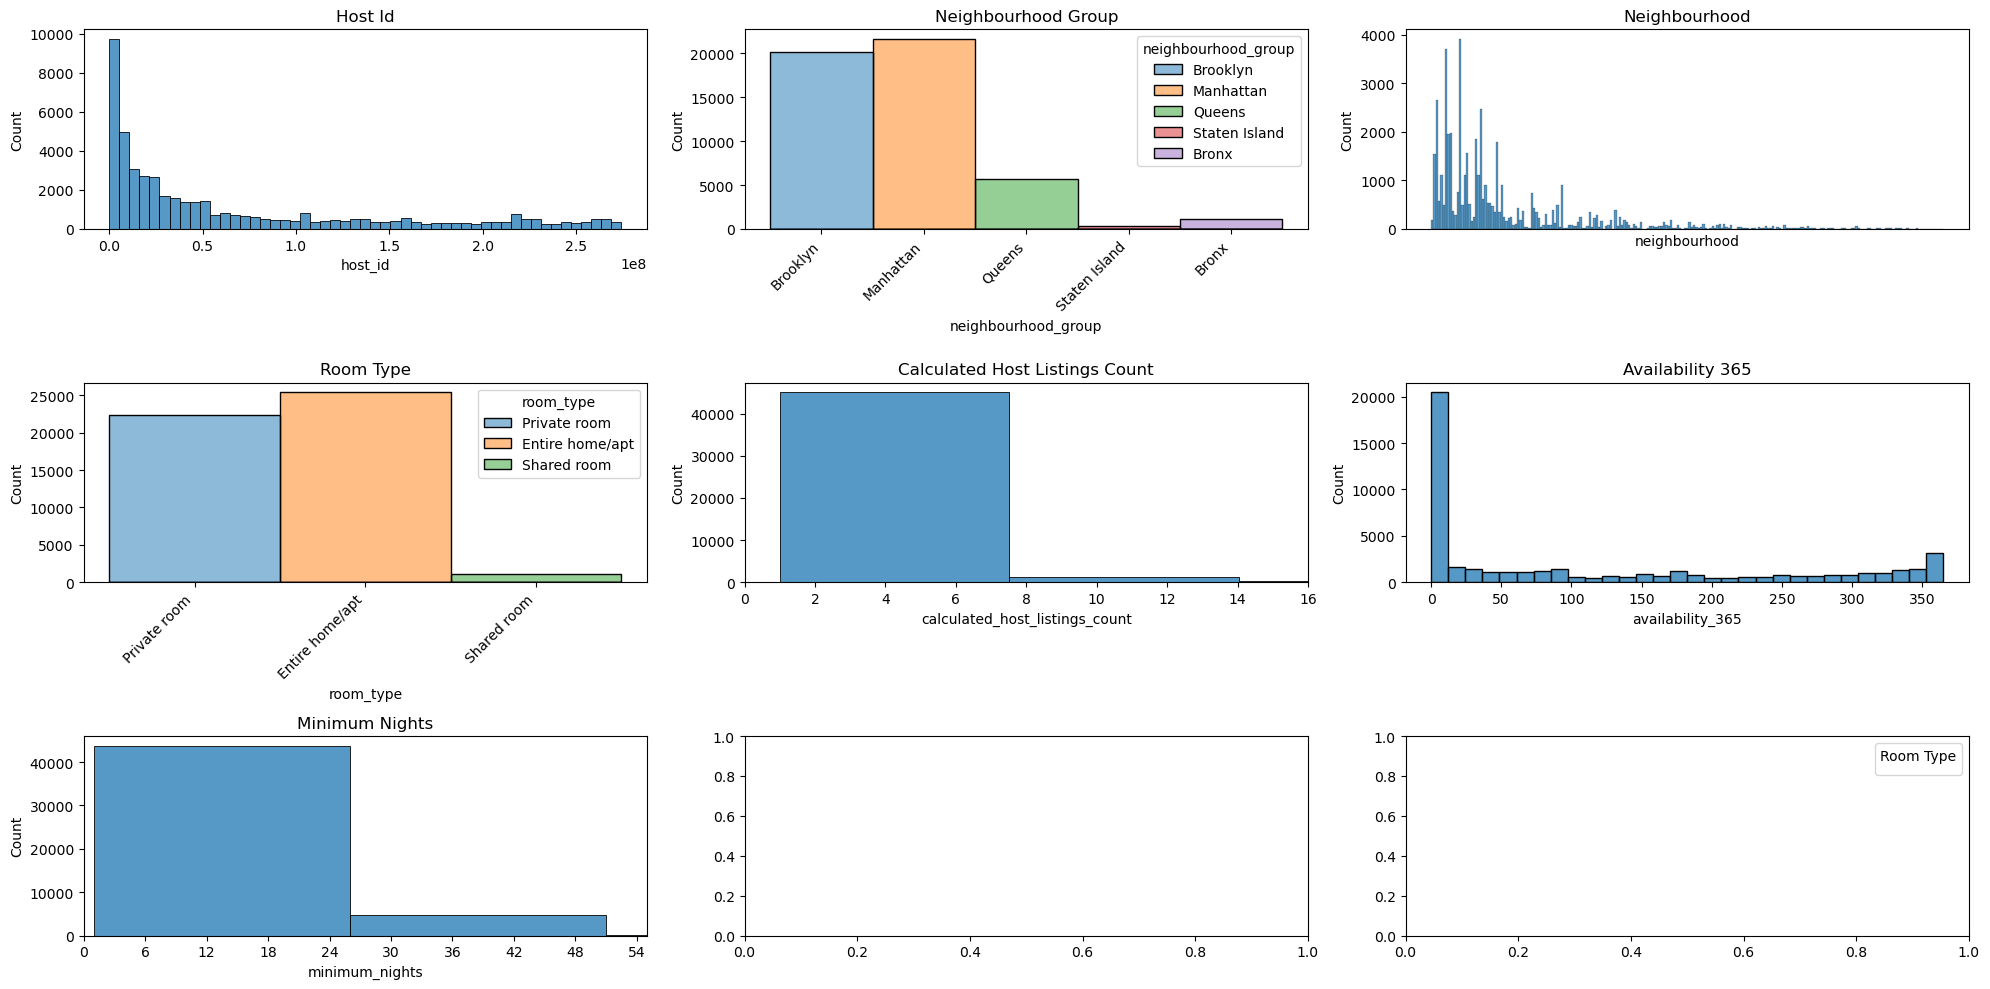

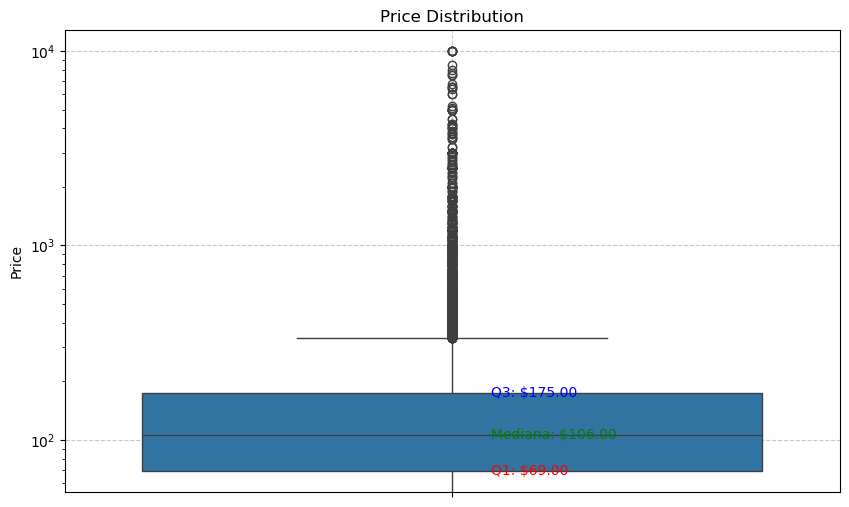

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

URL = 'https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv'

def getData(URL:str) -> pd.DataFrame:
    raw_data = pd.read_csv(URL)
    return pd.DataFrame(raw_data)

def format_text(text: str) -> str:
    return text.replace('_', ' ').title()

def cleanedData(df:pd.DataFrame) -> pd.DataFrame:
    df_ = df.copy()
    df_.drop('id', axis=1).duplicated() # No borra nada pero sería necesario en caso de que hubiera filas duplicada
    df_.drop(['id', 'name', 'host_name', 'last_review'], axis=1, inplace=True)
    return df_

def histplot(columns, cleaned_data, axis_array):
    num_rows, num_cols = axis_array.shape

    for i, column in enumerate(columns):
        row = i // num_cols
        col = i % num_cols

        if row < num_rows and col < num_cols:
            ax = axis_array[row,col]
            ax.set_title(format_text(column))

            if column in ['calculated_host_listings_count', 'minimum_nights']:
                # Esto es necesario para que se pueda ver de forma más razonables los histogramas. Lo que hacemos es cortar el número de valores del eje abscisas que vemos
                sns.histplot(ax=ax, data=cleaned_data, x=column, bins=50)
                if column == 'calculated_host_listings_count':
                    ax.set_xlim(0, 16)
                elif column == 'minimum_nights':
                    ax.set_xlim(0, 55)

                ax.xaxis.set_major_locator(MaxNLocator(integer=True))

            elif column in ['neighbourhood_group', 'room_type']:
                sns.histplot(ax=ax, data=cleaned_data, x=column, hue=column)
                plt.legend(title=format_text(column))
            else:
                sns.histplot(ax = ax, data = cleaned_data, x = column)

            if column == 'neighbourhood':
                ax.set_xticks([])
            if column in ['neighbourhood_group', 'room_type']:
                plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

def boxplot(cleaned_data):
    plt.figure(figsize=(10,6))
    ax_price = sns.boxplot(data=cleaned_data, y='price')
    plt.title('Price Distribution')
    plt.ylabel('Price')
    plt.grid(True, linestyle='--', alpha=0.7)
    ax_price.set_yscale('log')
    Q1 = cleaned_data['price'].quantile(0.25)
    Mediana = cleaned_data['price'].quantile(0.50)
    Q3 = cleaned_data['price'].quantile(0.75)

    # Anotar los valores en el boxplot
    # Las coordenadas X para el boxplot de una sola variable son 0 para un boxplot vertical.
    # La coordenada Y es el valor del cuartil.
    ax_price.text(x=0.05, y=Q1, s=f'Q1: ${Q1:.2f}', color='red', va='center', ha='left', fontsize=10)
    ax_price.text(x=0.05, y=Mediana, s=f'Mediana: ${Mediana:.2f}', color='green', va='center', ha='left', fontsize=10)
    ax_price.text(x=0.05, y=Q3, s=f'Q3: ${Q3:.2f}', color='blue', va='center', ha='left', fontsize=10)
    plt.show()

def main():
    raw_data = getData(URL)
    cleaned_data = cleanedData(raw_data)
    print(cleaned_data.info())

    # Histogramas
    histplot_variables = ['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'calculated_host_listings_count', 'availability_365', 'minimum_nights']
    columns = 3
    rows = len(histplot_variables) // 2
    fig, axis = plt.subplots(rows, columns, figsize=(20, 10))
    histplot(histplot_variables, cleaned_data, axis)
    plt.tight_layout()
    plt.show()

    # Boxplot
    boxplot(cleaned_data)

    # Multivariante
main()

**NOTA:** Para representar mejor los datos del boxplot encontré en Internet una escala logarítmica en el eje de ordenadas (Y) que representa los datos de forma que 10 está a la misma distancia que 100 y 100 que 1000 por lo que comprime mejor los valores altos y 'descomprime' los valores bajos para hacer el boxplot más legible

### Análisis de Distribuciones:

#### Variables Categóricas:

- **Neightbourhood group (Distrito)**: La distribución geográfica de los alojamientos presenta una marca concentración de oferta en Brooklyn y Manhattan mientras que se aprecia marcadamente menor en Staten Island y el Bronx siendo, en particular, Staten Island un mercado prácticamente marginal.
- **Neighbourhood (Barrios)**: La distribución geográfica a nivel de barrios revela que hay una concentración significativa de alojamientos en determinados barrios frente al resto de estos.
- **Room type (Tipo de habitaciones)**: El análisis revela que la mayoría del alojamiento está dominado por habitaciones privadas o propiedades completas (casa o apartamento). Esto sugiere una marca preferencia del mercado hacia estas opciones.

#### Variables Numéricas:

- **Host ID (ID del Anfitrión)**: La mayoría de los host tienen un ID menor de 50M lo que podría revelar cierta luz en cómo son los anfitriones si conocemos cómo se forman los IDs de estos.
- **Calculated host listings count (Número de alojamientos diferentes de un mismo anfitrión)**: Los datos revelan que la mayoría de anfitriones no tienen más de 7 alojamientos y no se registran anfitriones con más de 14 alojamientos.
- **Availability_365 (Disponibilidad)**: La distribución de alojamientos presenta un patrón bimodal donde la gran mayoría de estos están disponibles con una disponibilidad muy limitada (menos de 10 días anuales) y otro donde la disponibilidad es practicamente o totalmente completa durante todo el año. Esto sugiere dos claras estrategias de negocio.
- **Minimum nights (Estancia mínima requerida)**: La mayoría de alojamientos establecen como requisito entre 1 y 25 noches mientras que puede verse que, en casos excepcionales, se requiere de más días llegando incluso hasta las 50 noches.


No consideré importante graficar individualmente latitude, longitude, number_of_reviews y reviews_per_month ya que no creo que podamos extraer información relevante para el menester de predecir el precio de un alojamiento.

**En resumen, se puede extraer que la mayoría del mercado se sitúa en Brooklyn y Manhattan donde el mercado prefiere alojamientos de habitaciones privadas o propiedades enteras con una disponibilidad o bien limitada o bien completa o casi completa donde se pide al consumidor una media de 13 noches de estancia como mínimo.**